In [1]:
#Install the libraries that will be needed to complete the project,
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Load in the datasets I will be working with: 2020, 2021, 2022, and SNAP participation from 1989 to 2022
df_2022 = pd.read_excel('est22us.xls',skiprows=3)
df_2021 = pd.read_excel('est21all.xls', skiprows=3)
df_2020 = pd.read_excel("est20all.xls", skiprows=3, engine="xlrd")
snap_df = pd.read_excel('cntysnap.xls', skiprows=2, engine="xlrd")
snap_df.head()

,State FIPS code,County FIPS code,Name,July 2022,July 2021,July 2020,July 2019,July 2018,July 2017,July 2016,...,July 2003,July 2002,July 2001,July 2000,July 1999,July 1998,July 1997,July 1995,July 1993,July 1989
0,1,0,Alabama,776084.0,758481.0,765438.0,722827.0,735512.0,775830.0,813769.0,...,491910.0,463998.0,435235.0,405325.0,396931.0,409160.0,434632.0,510271.0,561128.0,435296.0
1,1,1,"Autauga County, AL",8029.0,7617.0,7917.0,7449.0,7477.0,7696.0,7844.0,...,3594.0,3352.0,3035.0,2814.0,2700.0,2589.0,2771.0,3611.0,4608.0,3739.0
2,1,3,"Baldwin County, AL",20790.0,20532.0,21758.0,19860.0,19499.0,20241.0,21406.0,...,5659.0,4945.0,4129.0,4178.0,4372.0,4850.0,5201.0,6928.0,8053.0,5548.0
3,1,5,"Barbour County, AL",6082.0,5854.0,5884.0,5841.0,5898.0,6124.0,6675.0,...,4981.0,4959.0,4637.0,4415.0,4490.0,4788.0,4947.0,5268.0,5499.0,5056.0
4,1,7,"Bibb County, AL",3434.0,3477.0,3500.0,3123.0,3263.0,3504.0,3740.0,...,2116.0,1953.0,1765.0,1685.0,1631.0,1776.0,1999.0,2085.0,2503.0,2056.0


In [3]:
#Clean the 2020 data set first
# Keep only relevant columns
columns_to_keep = [
    "Postal Code", "Name",
    "Poverty Estimate, All Ages",
    "Poverty Percent, All Ages",
    "Median Household Income"
]

df_2020_cleaned = df_2020[columns_to_keep].copy()

# Rename columns for easier access
df_2020_cleaned.columns = ["State", "Name", "Poverty_Estimate", "Poverty_Percent", "Median_Income"]

# Convert columns to numeric where appropriate, treating '.' as NaN
df_2020_cleaned["Poverty_Estimate"] = pd.to_numeric(df_2020_cleaned["Poverty_Estimate"], errors='coerce')
df_2020_cleaned["Poverty_Percent"] = pd.to_numeric(df_2020_cleaned["Poverty_Percent"], errors='coerce')
df_2020_cleaned["Median_Income"] = pd.to_numeric(df_2020_cleaned["Median_Income"], errors='coerce')

# Drop rows where all three core values are missing
df_2020_cleaned = df_2020_cleaned.dropna(subset=["Poverty_Estimate", "Poverty_Percent", "Median_Income"], how='all')

# Show the cleaned data
df_2020_cleaned.head()

,State,Name,Poverty_Estimate,Poverty_Percent,Median_Income
0,US,United States,38371394.0,11.9,67340.0
1,AL,Alabama,714568.0,14.9,53958.0
2,AL,Autauga County,6242.0,11.2,67565.0
3,AL,Baldwin County,20189.0,8.9,71135.0
4,AL,Barbour County,5548.0,25.5,38866.0


<ipython-input-20-57840910cfd1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="State", y="Poverty_Percent", data=df_2020_cleaned, palette="coolwarm")


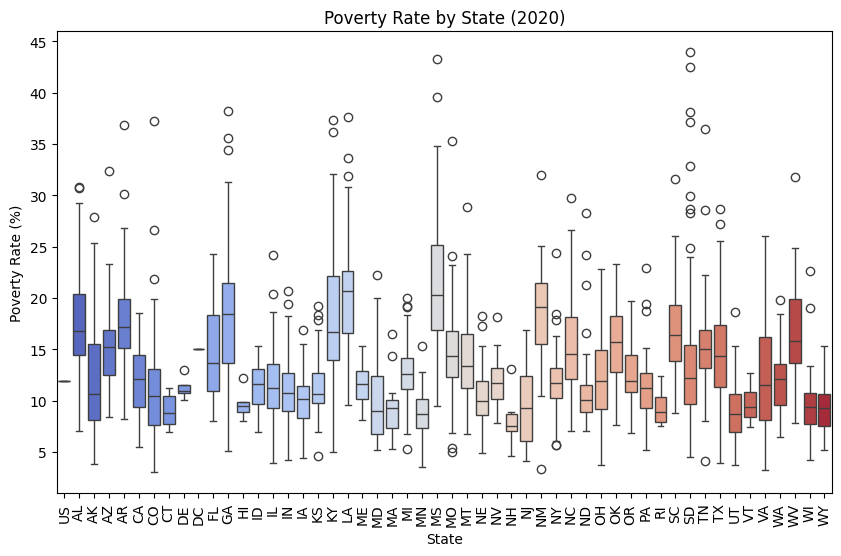

<ipython-input-20-57840910cfd1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Name", y="July 2020", data=snap_2022_sorted, palette="coolwarm")


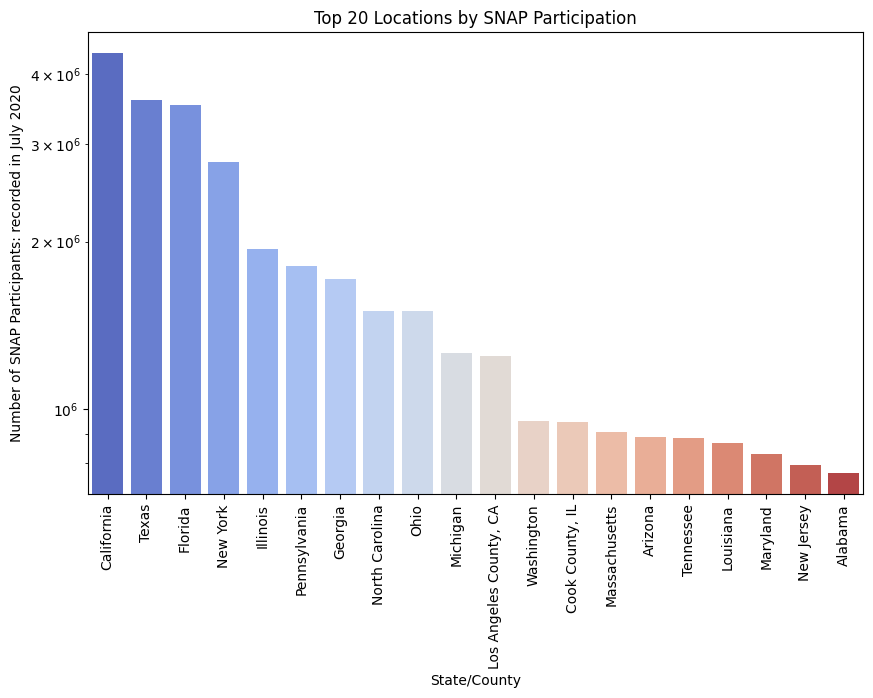

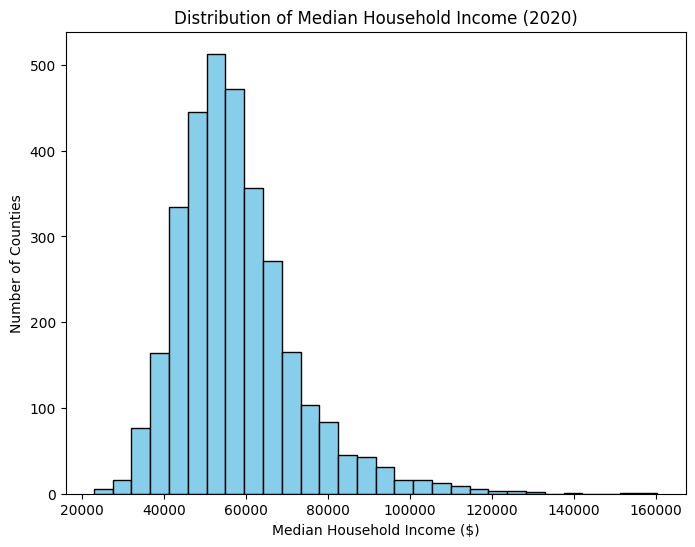

In [20]:
#Basic data visualizations from the 2020 dataset
#Proposal EDA: only used the 2020 dataset for this to get an idea of what I was in for
# Plot boxplot for 2020...
plt.figure(figsize=(10, 6))
sns.boxplot(x="State", y="Poverty_Percent", data=df_2020_cleaned, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Poverty Rate (%)")
plt.title("Poverty Rate by State (2020)")
plt.show()

# Top 20 states/counties of SNAP participants
snap_2022_sorted = snap_df.sort_values(by="July 2020", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x="Name", y="July 2020", data=snap_2022_sorted, palette="coolwarm")
plt.xticks(rotation=90)
plt.yscale("log")
plt.xlabel("State/County")
plt.ylabel("Number of SNAP Participants: recorded in July 2020")
plt.title("Top 20 Locations by SNAP Participation")
plt.show()

# Plot histogram for the median household income for 2020
plt.figure(figsize=(8, 6))
plt.hist(df_2020_cleaned['Median_Income'], bins=30, color="skyblue", edgecolor='black')
plt.xlabel("Median Household Income ($)")
plt.ylabel("Number of Counties")
plt.title("Distribution of Median Household Income (2020)")
plt.show()

In [5]:
#Clean the 2021 data set
df_2021_cleaned = df_2021[columns_to_keep].copy()
df_2021_cleaned.columns = ["State", "Name", "Poverty_Estimate", "Poverty_Percent", "Median_Income"]

df_2021_cleaned["Poverty_Estimate"] = pd.to_numeric(df_2021_cleaned["Poverty_Estimate"], errors='coerce')
df_2021_cleaned["Poverty_Percent"] = pd.to_numeric(df_2021_cleaned["Poverty_Percent"], errors='coerce')
df_2021_cleaned["Median_Income"] = pd.to_numeric(df_2021_cleaned["Median_Income"], errors='coerce')

df_2021_cleaned = df_2021_cleaned.dropna(subset=["Poverty_Estimate", "Poverty_Percent", "Median_Income"], how='all')

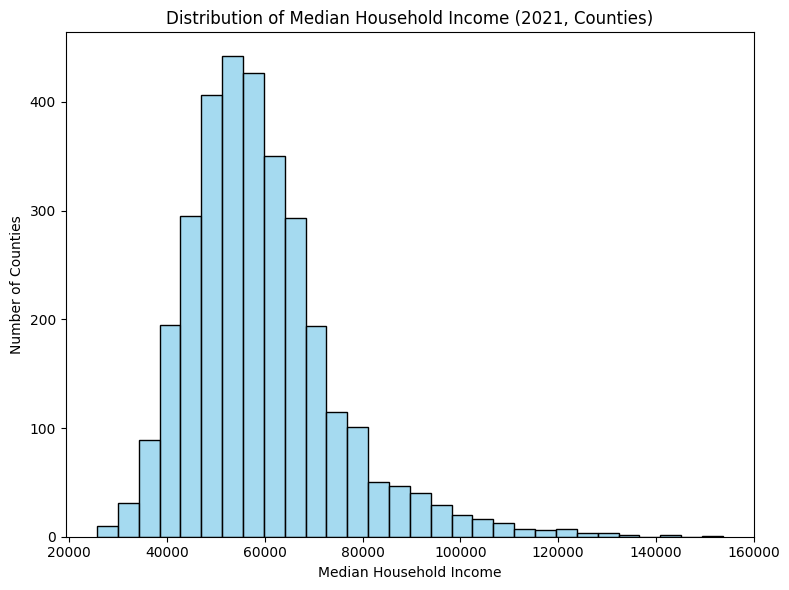

<ipython-input-6-d9b3dda6b630>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


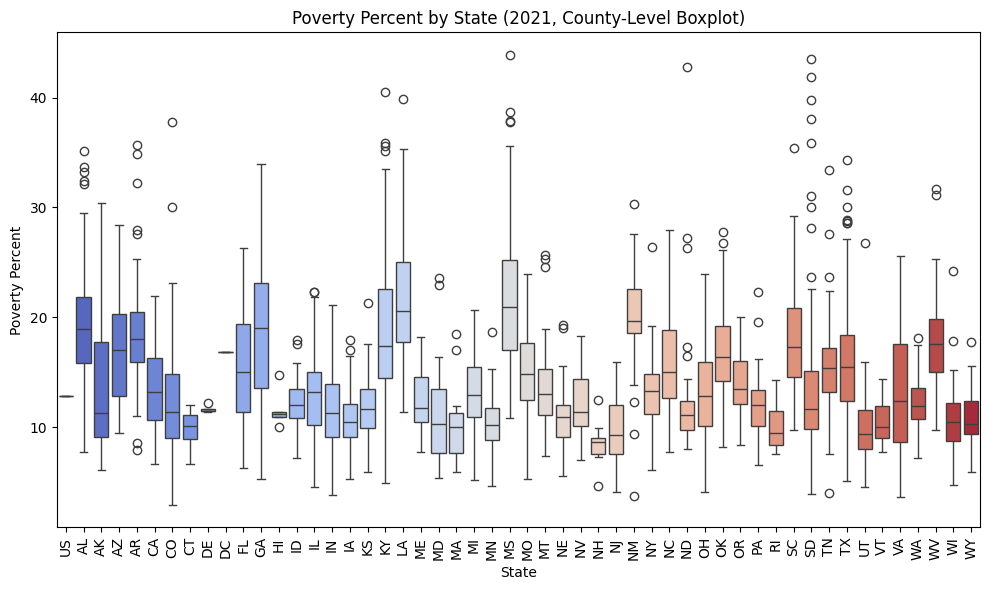

In [6]:
#Data visualizations for 2021 - just like those for 2020
#Median income
plt.figure(figsize=(8, 6))
sns.histplot(df_2021_cleaned["Median_Income"].dropna(), bins=30, color="skyblue")
plt.title("Distribution of Median Household Income (2021, Counties)")
plt.xlabel("Median Household Income")
plt.ylabel("Number of Counties")
plt.tight_layout()
plt.show()

#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_2021_cleaned,
    x="State",
    y="Poverty_Percent",
    palette="coolwarm"
)
plt.title("Poverty Percent by State (2021, County-Level Boxplot)")
plt.xlabel("State")
plt.ylabel("Poverty Percent")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
#Clean 2022 data set
df_2022_cleaned = df_2022[columns_to_keep].copy()
df_2022_cleaned.columns = ["State", "Name", "Poverty_Estimate", "Poverty_Percent", "Median_Income"]

df_2022_cleaned["Poverty_Estimate"] = pd.to_numeric(df_2022_cleaned["Poverty_Estimate"], errors='coerce')
df_2022_cleaned["Poverty_Percent"] = pd.to_numeric(df_2022_cleaned["Poverty_Percent"], errors='coerce')
df_2022_cleaned["Median_Income"] = pd.to_numeric(df_2022_cleaned["Median_Income"], errors='coerce')

df_2022_cleaned = df_2022_cleaned.dropna(subset=["Poverty_Estimate", "Poverty_Percent", "Median_Income"], how='all')
df_2022_cleaned.head()

,State,Name,Poverty_Estimate,Poverty_Percent,Median_Income
0,US,United States,40951625,12.6,74755
1,AL,Alabama,798469,16.2,59703
2,AK,Alaska,77305,10.8,88072
3,AZ,Arizona,904567,12.5,74355
4,AR,Arkansas,481650,16.3,55505


<ipython-input-8-2b76bcf80a09>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


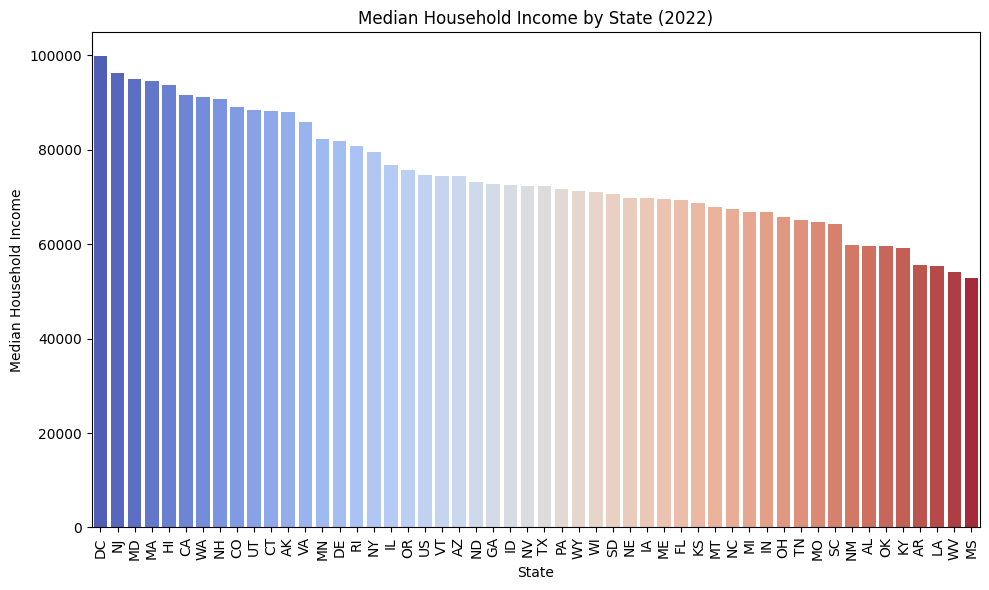

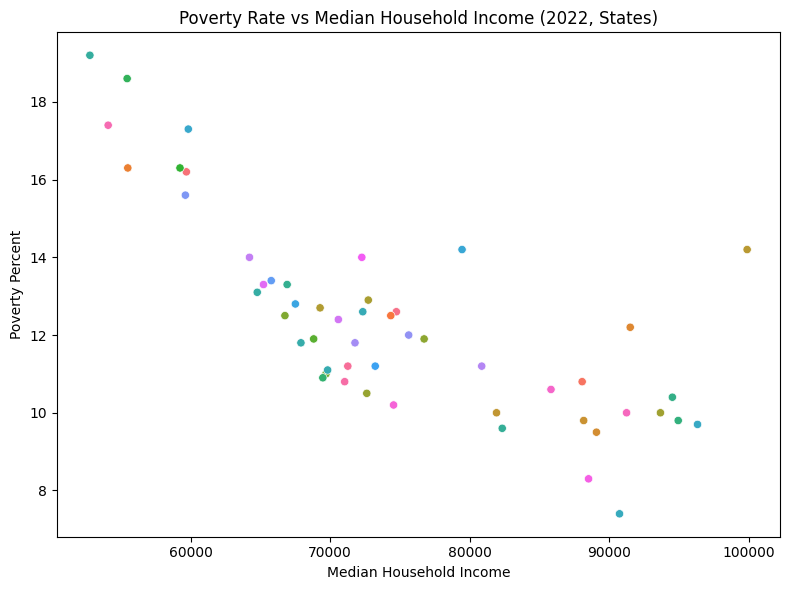

In [8]:
#Data visualizations for 2022 - similar to the other years
plt.figure(figsize=(10, 6))
sorted_df_2022 = df_2022_cleaned.sort_values("Median_Income", ascending=False)

sns.barplot(
    data=sorted_df_2022,
    x="State",
    y="Median_Income",
    palette="coolwarm"
)
plt.title("Median Household Income by State (2022)")
plt.xlabel("State")
plt.ylabel("Median Household Income")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Poverty rate vs median income

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_2022_cleaned,
    x="Median_Income",
    y="Poverty_Percent",
    hue="State",
    legend=False
)
plt.title("Poverty Rate vs Median Household Income (2022, States)")
plt.xlabel("Median Household Income")
plt.ylabel("Poverty Percent")
plt.tight_layout()
plt.show()

In [9]:
#Clean the SNAP data
# Keep only July 2020, July 2021, July 2022
snap_filtered = snap_df[["State FIPS code", "Name", "July 2020", "July 2021", "July 2022"]].copy()

# Melt into long format
snap_long = snap_filtered.melt(
    id_vars=["State FIPS code", "Name"],
    var_name="Year",
    value_name="SNAP_Participants"
)

# Clean up year
snap_long["Year"] = snap_long["Year"].str.extract(r"(\d{4})").astype(int)

# Rename for merging
snap_long.rename(columns={
    "State FIPS code": "State_FIPS",
    "Name": "Name"
}, inplace=True)

# Optional: remove rows with missing SNAP data
snap_long = snap_long.dropna(subset=["SNAP_Participants"])
snap_long.head()

,State_FIPS,Name,Year,SNAP_Participants
0,1,Alabama,2020,765438.0
1,1,"Autauga County, AL",2020,7917.0
2,1,"Baldwin County, AL",2020,21758.0
3,1,"Barbour County, AL",2020,5884.0
4,1,"Bibb County, AL",2020,3500.0


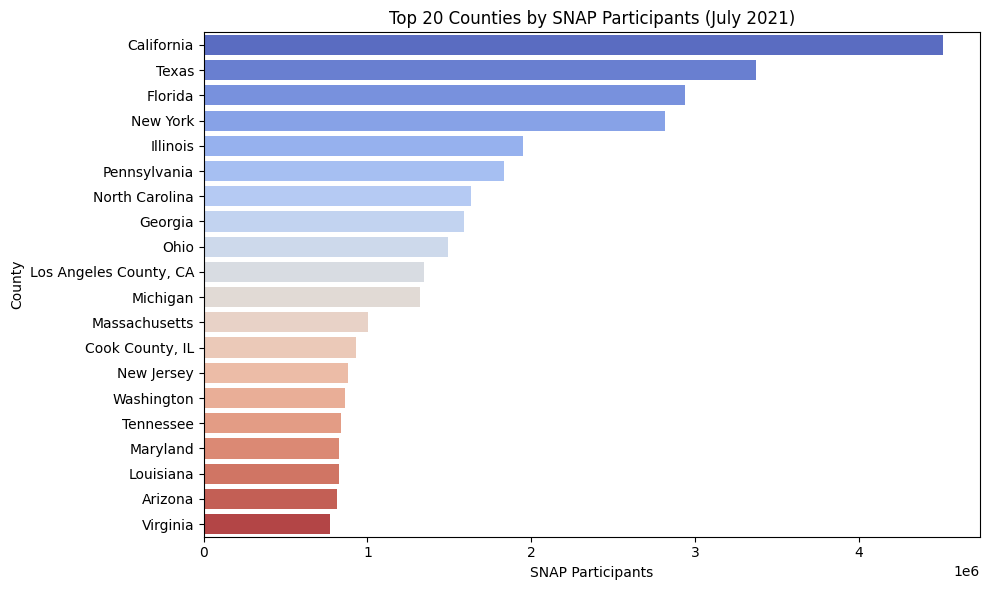

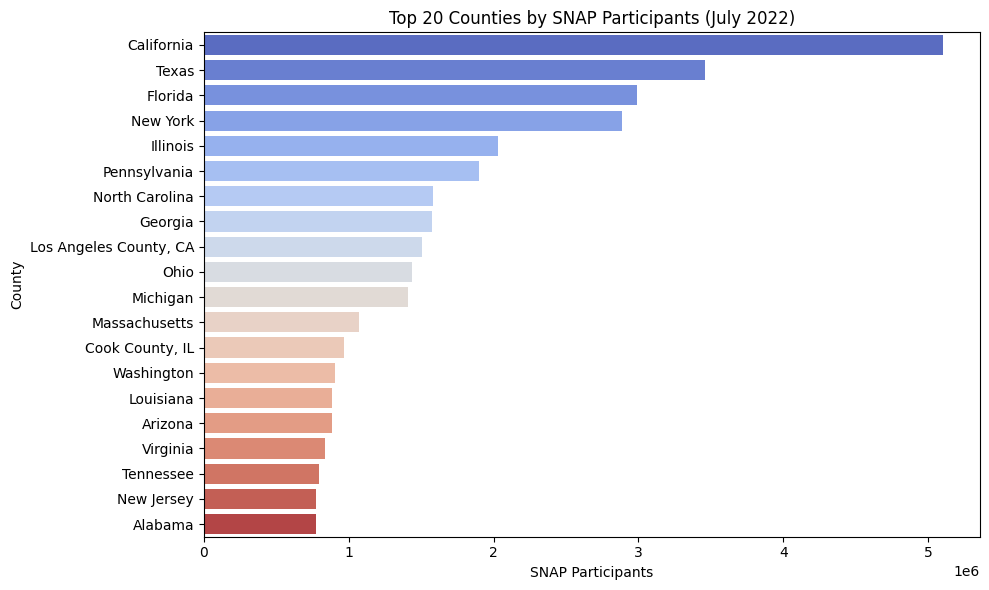

In [10]:
#SNAP visualizations
top_20_snap_2021 = snap_long[snap_long["Year"] == 2021].sort_values(
    "SNAP_Participants", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_20_snap_2021,
    y="Name",
    x="SNAP_Participants",
    hue="Name",
    dodge=False,
    palette="coolwarm"
)
plt.title("Top 20 Counties by SNAP Participants (July 2021)")
plt.xlabel("SNAP Participants")
plt.ylabel("County")
plt.tight_layout()
plt.show()

#2022
top_20_snap_2022 = snap_long[snap_long["Year"] == 2022].sort_values(
    "SNAP_Participants", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_20_snap_2022,
    y="Name",
    x="SNAP_Participants",
    hue="Name",
    dodge=False,
    palette="coolwarm"
)
plt.title("Top 20 Counties by SNAP Participants (July 2022)")
plt.xlabel("SNAP Participants")
plt.ylabel("County")
plt.tight_layout()
plt.show()


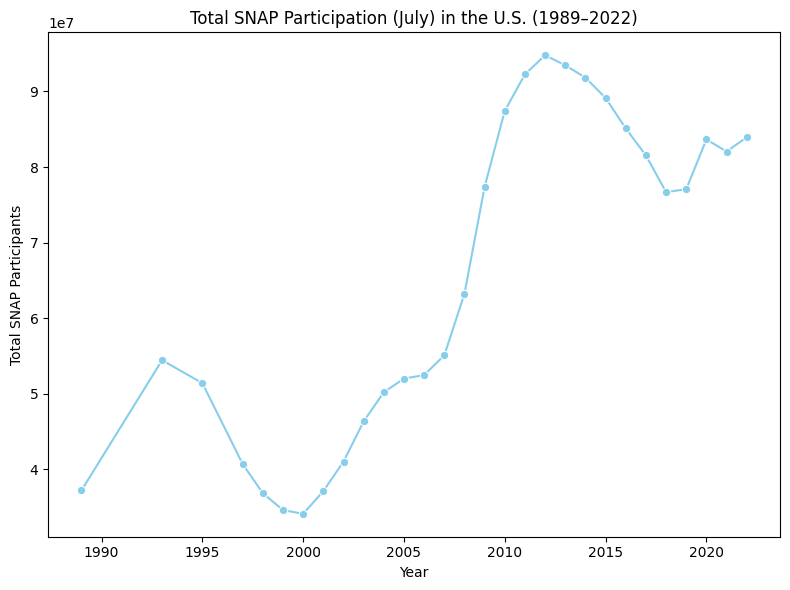

In [11]:
# Only keep columns that start with "July"
july_cols = [col for col in snap_df.columns if col.startswith("July")]

# Melt the dataset into long format
# Use "State FIPS code" instead of "State FIPS Code"
snap_long_all_years = snap_df.melt(
    id_vars=["State FIPS code", "Name"],  # Changed here
    value_vars=july_cols,
    var_name="Year",
    value_name="SNAP_Participants"
)

# Extract year as integer (e.g., "July 2020" -> 2020)
snap_long_all_years["Year"] = snap_long_all_years["Year"].str.extract(r"(\d{4})").astype(int)

# Convert participants to numeric
snap_long_all_years["SNAP_Participants"] = pd.to_numeric(snap_long_all_years["SNAP_Participants"], errors="coerce")

# Aggregate to national level
snap_trend = snap_long_all_years.groupby("Year")["SNAP_Participants"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=snap_trend, x="Year", y="SNAP_Participants", marker="o", color="skyblue")
plt.title("Total SNAP Participation (July) in the U.S. (1989–2022)")
plt.xlabel("Year")
plt.ylabel("Total SNAP Participants")
plt.tight_layout()
plt.show()

In [22]:
#Merged data of SNAP and 2020 and 2021 dataset
# Add year to poverty data
df_2020_cleaned["Year"] = 2020
df_2021_cleaned["Year"] = 2021

# Combine poverty 2020 and 2021
poverty_county = pd.concat([df_2020_cleaned, df_2021_cleaned], ignore_index=True)

# Merge with SNAP on State and Name (county name)
merged_county = pd.merge(
    poverty_county,
    snap_long[snap_long["Year"].isin([2020, 2021])],
    how="inner",
    on=["Name", "Year"]
)

# View result
print("County-level merged shape:", merged_county.shape)
merged_county.head()

County-level merged shape: (104, 8)


,State,Name,Poverty_Estimate,Poverty_Percent,Median_Income,Year,State_FIPS,SNAP_Participants
0,AL,Alabama,714568.0,14.9,53958.0,2020,1,765438.0
1,AK,Alaska,68714.0,9.6,79961.0,2020,2,77970.0
2,AZ,Arizona,932555.0,12.8,64652.0,2020,4,891259.0
3,AR,Arkansas,448665.0,15.2,51146.0,2020,5,361358.0
4,CA,California,4419167.0,11.5,83001.0,2020,6,4366231.0


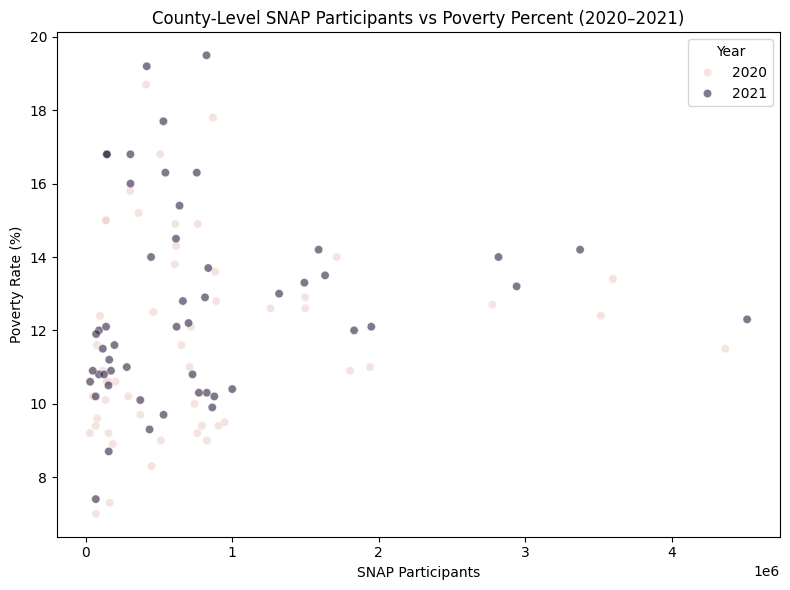

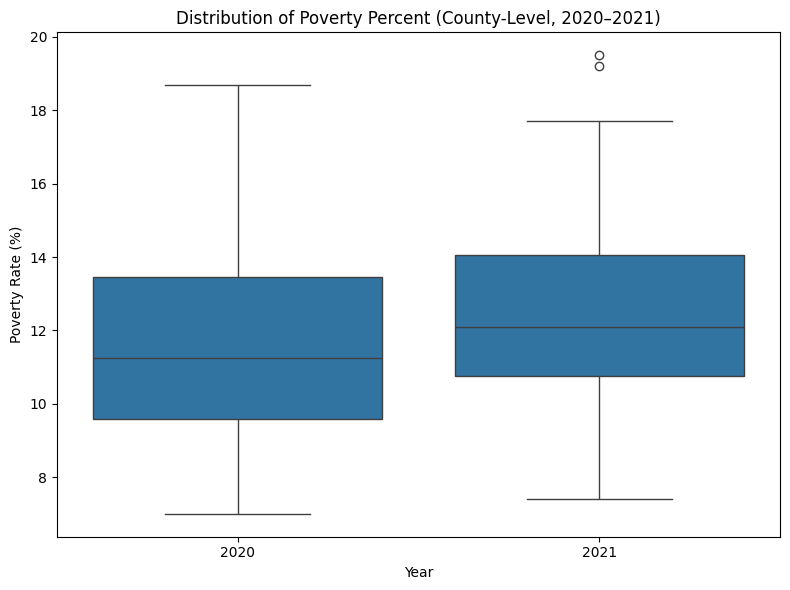

In [13]:
#Visualizations
#Scatterplot of Snap participation and Poverty percentage
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_county,
    x="SNAP_Participants",
    y="Poverty_Percent",
    hue="Year",
    alpha=0.6
)
plt.title("County-Level SNAP Participants vs Poverty Percent (2020–2021)")
plt.xlabel("SNAP Participants")
plt.ylabel("Poverty Rate (%)")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

#Boxplots for each year
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_county, x="Year", y="Poverty_Percent")
plt.title("Distribution of Poverty Percent (County-Level, 2020–2021)")
plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")
plt.tight_layout()
plt.show()

In [14]:
#Merged data of SNAP and 2022
# First, make sure 'SNAP_Participants' is numeric
snap_long["SNAP_Participants"] = pd.to_numeric(snap_long["SNAP_Participants"], errors='coerce')
df_2022_cleaned["Year"] = 2022

# Group by state and sum all SNAP participants
snap_2022_state = snap_long.groupby(["Name", "Year"], as_index=False)["SNAP_Participants"].sum()

# Now merge with 2022 poverty data
merged_2022_state = pd.merge(
    df_2022_cleaned,
    snap_2022_state,
    on=["Name", "Year"],
    how="inner"
)

print("Merged shape (2022, state level):", merged_2022_state.shape)
merged_2022_state.head()

Merged shape (2022, state level): (51, 7)


,State,Name,Poverty_Estimate,Poverty_Percent,Median_Income,Year,SNAP_Participants
0,AL,Alabama,798469,16.2,59703,2022,776084.0
1,AK,Alaska,77305,10.8,88072,2022,95543.0
2,AZ,Arizona,904567,12.5,74355,2022,883790.0
3,AR,Arkansas,481650,16.3,55505,2022,251315.0
4,CA,California,4673718,12.2,91517,2022,5102837.0


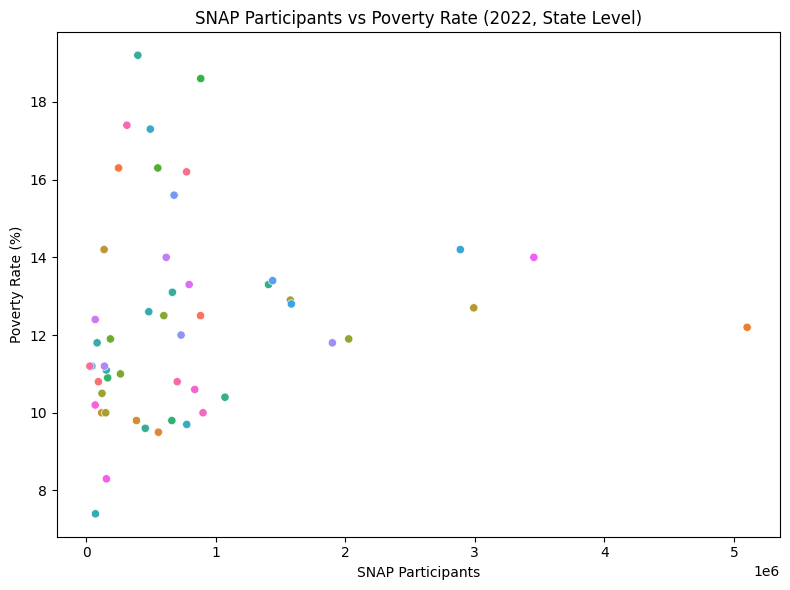

<ipython-input-15-67d4bda1a731>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


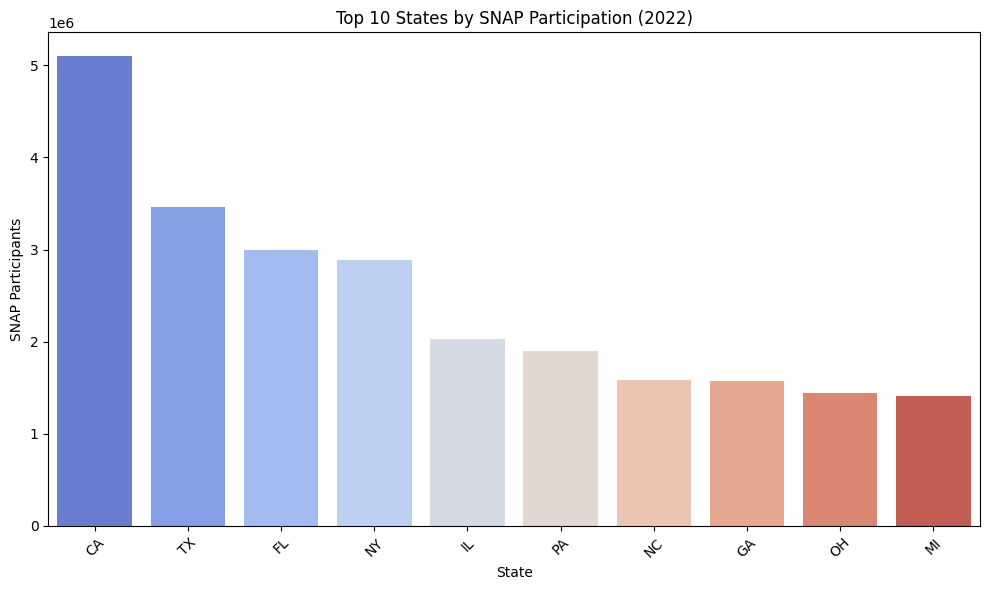

<ipython-input-15-67d4bda1a731>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


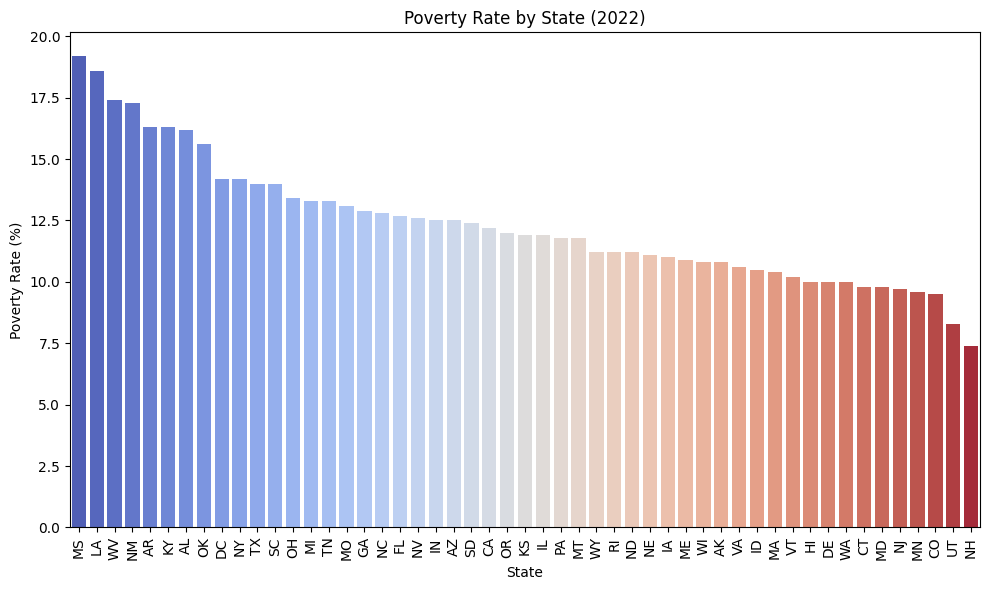

In [15]:
#Visualizations
#Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_2022_state,
    x="SNAP_Participants",
    y="Poverty_Percent",
    hue="State",
    legend=False
)
plt.title("SNAP Participants vs Poverty Rate (2022, State Level)")
plt.xlabel("SNAP Participants")
plt.ylabel("Poverty Rate (%)")
plt.tight_layout()
plt.show()

#Top States for 2022 participation
top_snap_states = merged_2022_state.sort_values(by="SNAP_Participants", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_snap_states,
    x="State",
    y="SNAP_Participants",
    palette="coolwarm"
)
plt.title("Top 10 States by SNAP Participation (2022)")
plt.xlabel("State")
plt.ylabel("SNAP Participants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Poverty rate by state
plt.figure(figsize=(10, 6))
sorted_states = merged_2022_state.sort_values("Poverty_Percent", ascending=False)

sns.barplot(
    data=sorted_states,
    x="State",
    y="Poverty_Percent",
    palette="coolwarm"
)
plt.title("Poverty Rate by State (2022)")
plt.xlabel("State")
plt.ylabel("Poverty Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


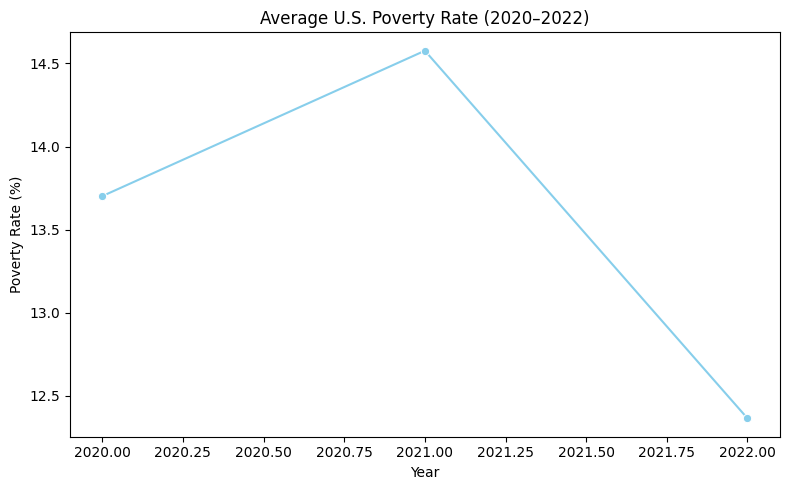

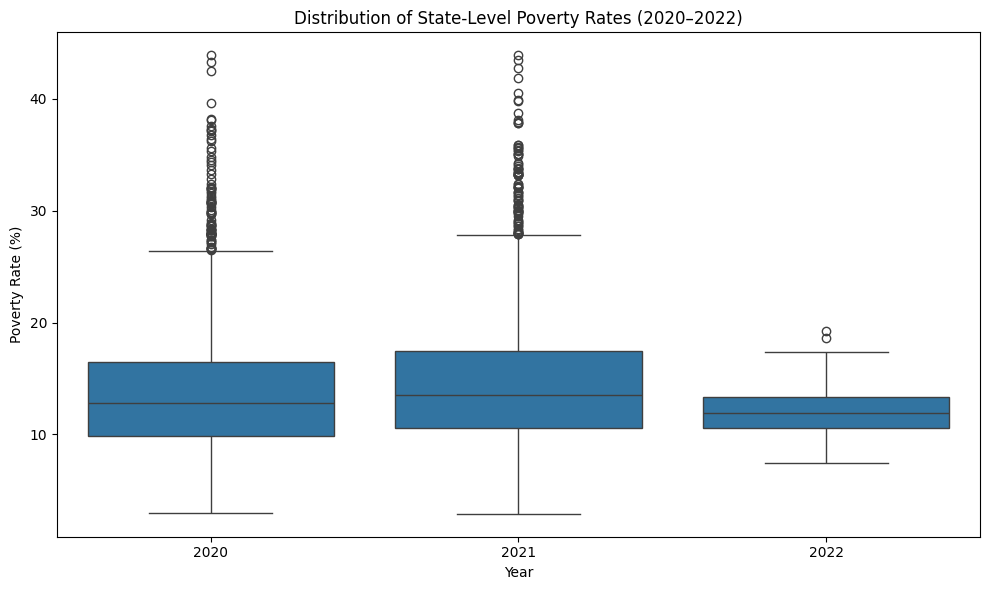

In [24]:
poverty_all = pd.concat([df_2020_cleaned, df_2021_cleaned, df_2022_cleaned], ignore_index=True)
poverty_trend = poverty_all.groupby("Year")["Poverty_Percent"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=poverty_trend, x="Year", y="Poverty_Percent", marker="o", color="skyblue")
plt.title("Average U.S. Poverty Rate (2020–2022)")
plt.ylabel("Poverty Rate (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=poverty_all, x="Year", y="Poverty_Percent")
plt.title("Distribution of State-Level Poverty Rates (2020–2022)")
plt.ylabel("Poverty Rate (%)")
plt.tight_layout()
plt.show()